# **Business Problem**

A digital marketing team conducted two ad campaigns throughout 2024, one on Facebook and the other on Google, they need to determine which platform generates better results in terms of clicks, conversion rate and overall cost-effectiveness so they can allocate their budget more efficiently and optimize advertising strategies to ensure higher returns on investment.
<br><br>
# **Objective**

The goal of this analysis is to compare the performance of Facebook and Google ad campaigns by analyzing clicks, conversion rates, and cost-effectiveness, in order to identify the platform that provides better returns on investment.
<br><br>





<br>

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Data Overview**

In [2]:
## Loading Data
file_id = '18VPWNEwrwCt8lJuRRsNOBwvDPBrXMJ1F'
df = pd.read_csv(f'https://drive.google.com/uc?export=download&id={file_id}')
df = df[df['date_of_campaign']>= "2024-01-02"]
df

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
659,2024-01-02,FACEBOOK AD,2398,56,17,69,2.34,30.36,1.23,ADWORD AD,4485,55,6,83,1.23,10.91,1.51
660,2024-01-03,FACEBOOK AD,1104,18,16,65,1.63,88.89,3.61,ADWORD AD,5241,63,7,154,1.20,11.11,2.44
661,2024-01-03,FACEBOOK AD,3130,20,19,114,0.64,95.00,5.70,ADWORD AD,5468,71,7,100,1.30,9.86,1.41
662,2024-01-07,FACEBOOK AD,1359,56,15,77,4.12,26.79,1.38,ADWORD AD,4000,72,7,78,1.80,9.72,1.08
663,2024-01-07,FACEBOOK AD,1593,46,10,127,2.89,21.74,2.76,ADWORD AD,4962,67,7,69,1.35,10.45,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-12-17,FACEBOOK AD,1154,56,8,161,4.85,14.29,2.88,ADWORD AD,4275,73,3,54,1.71,4.11,0.74
996,2024-12-18,FACEBOOK AD,1108,58,13,198,5.23,22.41,3.41,ADWORD AD,4749,55,5,116,1.16,9.09,2.11
997,2024-12-18,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,4582,36,4,149,0.79,11.11,4.14
998,2024-12-20,FACEBOOK AD,1279,59,19,171,4.61,32.20,2.90,ADWORD AD,4877,66,6,65,1.35,9.09,0.98


In [3]:
## rows & columns of dataset
df.shape

(341, 17)

In [4]:
## basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 659 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_campaign          341 non-null    object 
 1   facebook_ad_campaign      341 non-null    object 
 2   facebook_ad_views         341 non-null    int64  
 3   facebook_ad_clicks        341 non-null    int64  
 4   facebook_ad_conversions   341 non-null    int64  
 5   facebook_cost_per_ad      341 non-null    int64  
 6   facebook_ctr              341 non-null    float64
 7   facebook_conversion_rate  341 non-null    float64
 8   facebook_cost_per_click   341 non-null    float64
 9   adword_ad_campaign        341 non-null    object 
 10  adword_ad_views           341 non-null    int64  
 11  adword_ad_clicks          341 non-null    int64  
 12  adword_ad_conversions     341 non-null    int64  
 13  adword_cost_per_ad        341 non-null    int64  
 14  adword_ctr   

In [5]:
## checking null value
df.isna().any()

,0
date_of_campaign,False
facebook_ad_campaign,False
facebook_ad_views,False
facebook_ad_clicks,False
facebook_ad_conversions,False
facebook_cost_per_ad,False
facebook_ctr,False
facebook_conversion_rate,False
facebook_cost_per_click,False
adword_ad_campaign,False


In [6]:
## checking duplicates
df.duplicated().any()

np.False_

In [7]:
#3 Descriptive Statistics
df.describe()

,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,2096.847507,45.419355,12.131965,155.991202,2.408944,31.955425,4.155865,4781.328446,61.061584,5.797654,120.398827,1.297830,10.360352,2.155572
std,646.216309,16.619357,4.432189,55.901462,1.206144,20.364823,2.739276,587.659573,17.244582,2.024147,43.402553,0.409429,5.011741,1.084084
min,1051.000000,15.000000,5.000000,61.000000,0.490000,7.140000,1.030000,3720.000000,31.000000,3.000000,50.000000,0.580000,3.370000,0.650000
25%,1565.000000,31.000000,8.000000,109.000000,1.430000,17.540000,2.270000,4275.000000,45.000000,4.000000,79.000000,0.930000,6.670000,1.430000
50%,2047.000000,48.000000,12.000000,153.000000,2.270000,26.320000,3.410000,4809.000000,61.000000,6.000000,122.000000,1.290000,9.380000,1.920000
75%,2629.000000,59.000000,16.000000,206.000000,3.140000,40.620000,5.180000,5286.000000,76.000000,8.000000,155.000000,1.580000,12.500000,2.610000
max,3314.000000,73.000000,19.000000,250.000000,6.280000,118.750000,16.530000,5750.000000,89.000000,9.000000,199.000000,2.300000,29.030000,6.190000


In [8]:
##converting date table into date_time and creating new data tables
import datetime as dt
df['date_of_campaign'] = pd.to_datetime(df['date_of_campaign'])
df['month_of_campaign'] = df['date_of_campaign'].dt.month_name()
df['day_of_campaign'] = df['date_of_campaign'].dt.day_name()

# **Exploratory Data Analysis**

***Clicks comparison for both ad campaigns***

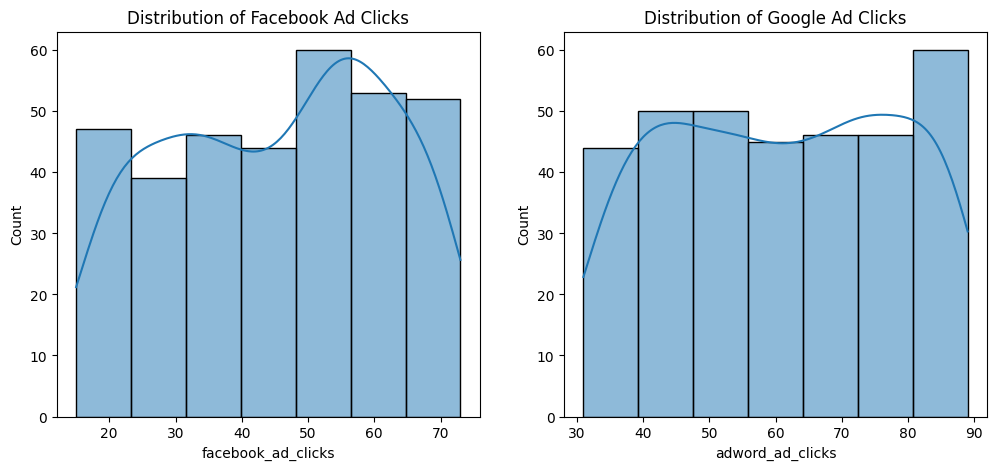

In [9]:
##Distribution of Clicks
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of Facebook Ad Clicks")
sns.histplot(df['facebook_ad_clicks'], bins =7, kde=True, edgecolor = 'k')
plt.subplot(1,2,2)
plt.title("Distribution of Google Ad Clicks")
sns.histplot(df['adword_ad_clicks'], bins = 7, kde=True, edgecolor = 'k')
plt.show()

The distribution of Facebook ad clicks is fairly balanced with a mild right skew, while AdWords clicks are more evenly spread but slightly left-skewed

***Conversion Comparison for both Ad campaigns***

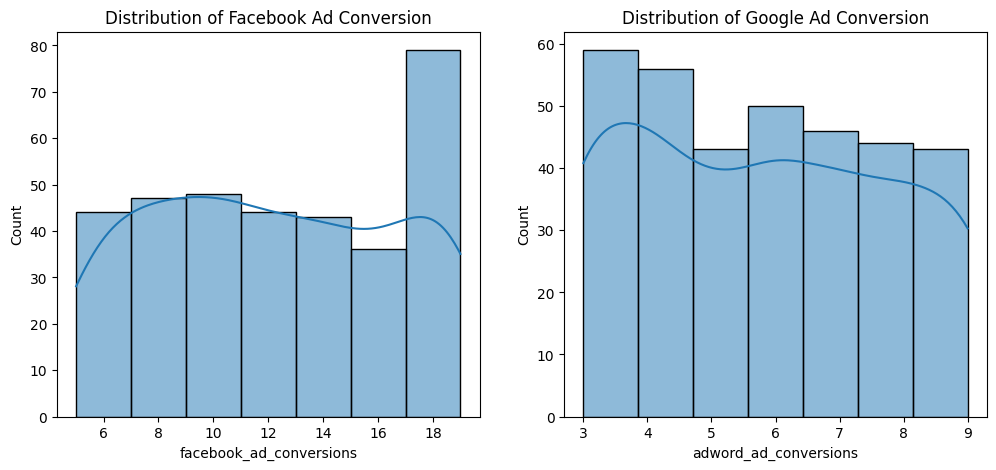

In [10]:
## Distribution of Conversion
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Distribution of Facebook Ad Conversion")
sns.histplot(df['facebook_ad_conversions'], bins = 7, kde=True, edgecolor='k')
plt.subplot(1,2,2)
plt.title("Distribution of Google Ad Conversion")
sns.histplot(df['adword_ad_conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

Facebook shows a stronger spread toward higher values (slightly right skewed) compared to AdWords, which appears more concentrated at lower conversions.

***Which Ad Campaigns perform better mostly?***

In [11]:
#3 Categorizing Daily Conversions
def conversion_categorize(col):
  category = []
  for convert in df[col]:
    if convert<6:
      category.append("Poor")
    elif convert>=6 and convert<11:
      category.append("Average")
    elif convert>=11 and convert<16:
      category.append("Good")
    elif convert>=16:
      category.append("Excellent")
  return category

df['Facebook_ad_conversion_category'] = conversion_categorize('facebook_ad_conversions')
df['Adword_ad_conversion_category'] = conversion_categorize('adword_ad_conversions')

In [12]:
Facebook_ads = pd.DataFrame(df['Facebook_ad_conversion_category'].value_counts()).reset_index().rename(columns={"Facebook_ad_conversion_category":"Category"})
Adword_ads = pd.DataFrame(df['Adword_ad_conversion_category'].value_counts()).reset_index().rename(columns={"Adword_ad_conversion_category":"Category"})
cat_df = pd.merge(Facebook_ads, Adword_ads, on='Category', how='outer').fillna(0)
cat_df = cat_df.iloc[[3,0,2,1]].reset_index()
cat_df.drop(columns='index', inplace=True)

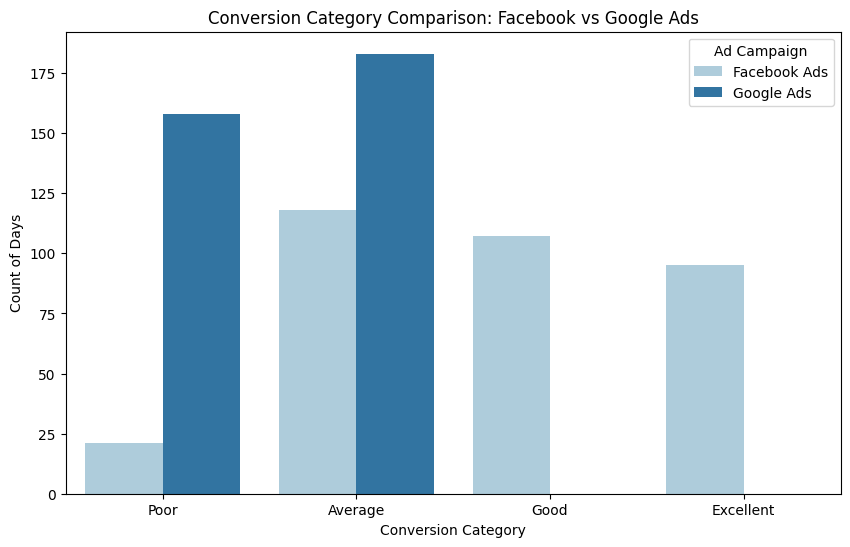

In [13]:
cat_df_melted = cat_df.melt(id_vars='Category', var_name='Ad Campaign', value_name='Count')
cat_df_melted['Ad Campaign'] = cat_df_melted['Ad Campaign'].replace({'count_x': 'Facebook Ads', 'count_y': 'Google Ads'})

plt.figure(figsize=(10, 6))
sns.barplot(data=cat_df_melted, x='Category', y='Count', hue='Ad Campaign', palette='Paired')
plt.title('Conversion Category Comparison: Facebook vs Google Ads')
plt.xlabel('Conversion Category')
plt.ylabel('Count of Days')
plt.show()

Google Ads results cluster mostly in the Poor and Average categories, showing weaker performance, while Facebook Ads achieve more Good and Excellent outcomes. This indicates Facebook delivers stronger conversions overall, whereas Google Ads struggles to move beyond lower performance tiers.

***Comparing Conversion Rates***

In [14]:
Facebook_ads_conversion = (df['facebook_ad_conversions'].sum() / df['facebook_ad_clicks'].sum()) * 100
adword_ads_conversion = (df['adword_ad_conversions'].sum() / df['adword_ad_clicks'].sum()) * 100
print(f"Facebook Ad Conversion Rate: {Facebook_ads_conversion:.2f}%")
print(f"Google Ad Conversion Rate: {adword_ads_conversion:.2f}%")

Facebook Ad Conversion Rate: 26.71%
Google Ad Conversion Rate: 9.49%


***Comparing Cost Per Click (CPC)***

In [15]:
Facebook_ads_cpc = df['facebook_cost_per_ad'].sum() / df['facebook_ad_clicks'].sum()
Adword_ads_cpc = df['adword_cost_per_ad'].sum() / df['adword_ad_clicks'].sum()
print(f"Facebook Ad Cost Per Click (CPC): ${Facebook_ads_cpc:.2f}")
print(f"Google Ad Cost Per Click (CPC): ${Adword_ads_cpc:.2f}")

Facebook Ad Cost Per Click (CPC): $3.43
Google Ad Cost Per Click (CPC): $1.97


***Comparing Cost Per Acquisition (CPA)***

In [16]:
Facebook_ads_cpa = df['facebook_cost_per_ad'].sum() / df['facebook_ad_conversions'].sum()
Adwords_cpa = df['adword_cost_per_ad'].sum() / df['adword_ad_conversions'].sum()

print(f"Facebook Ad Cost Per Acquisition (CPA): ${Facebook_ads_cpa:.2f}")
print(f"Google Ad Cost Per Acquisition (CPA): ${Adwords_cpa:.2f}")

Facebook Ad Cost Per Acquisition (CPA): $12.86
Google Ad Cost Per Acquisition (CPA): $20.77


# **Analyzing Campaigns Over Time**

***How does cpc changes overtime?***

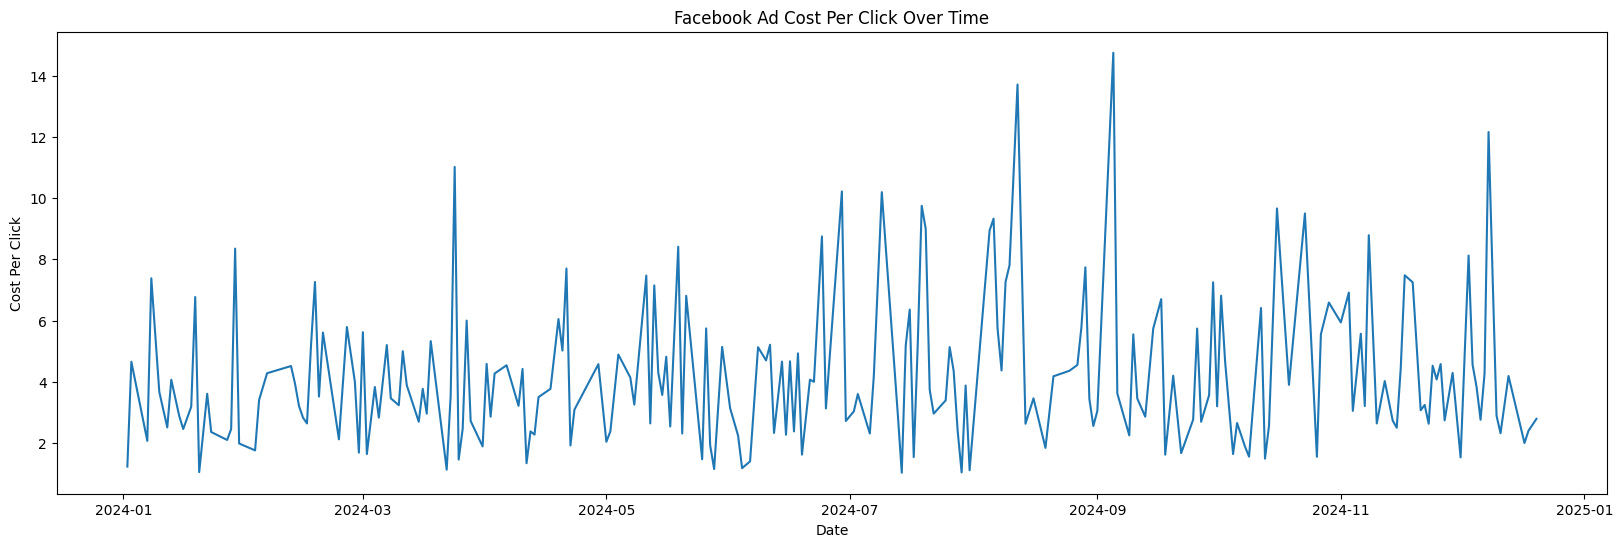

In [17]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['date_of_campaign'], y=df['facebook_cost_per_click'], errorbar=None)
plt.title("Facebook Ad Cost Per Click Over Time")
plt.xlabel("Date")
plt.ylabel("Cost Per Click")
plt.show()

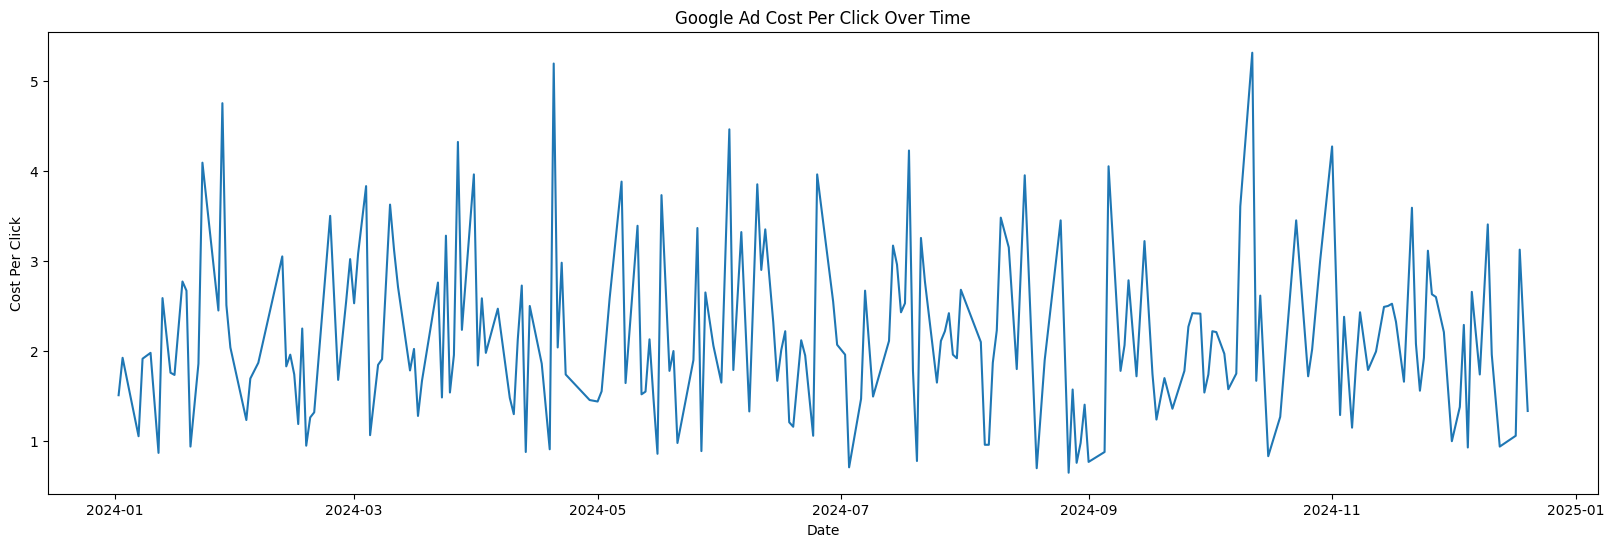

In [18]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['date_of_campaign'], y=df['adword_cost_per_click'], errorbar=None)
plt.title("Google Ad Cost Per Click Over Time")
plt.xlabel("Date")
plt.ylabel("Cost Per Click")
plt.show()

***Which Months get most conversions?***

In [19]:
##Calculating Conversions Per Month
month_names = ['January','February','Macrh','April','May','June','July','August','September','October','November','December']
monthly_converts_fb = df.groupby(by='month_of_campaign').agg({'facebook_ad_conversions': 'sum'}).reindex(month_names).reset_index()
monthly_converts_aw = df.groupby(by='month_of_campaign').agg({'adword_ad_conversions': 'sum'}).reindex(month_names).reset_index()

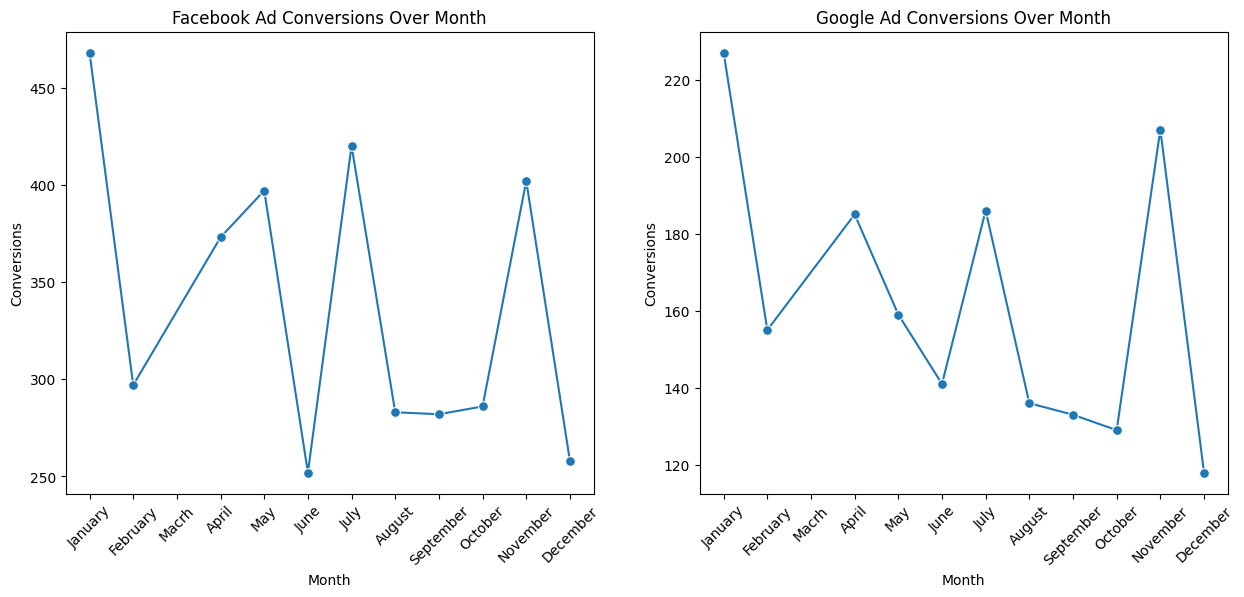

In [20]:
## For fb ads
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook Ad Conversions Over Month")
sns.lineplot(data=monthly_converts_fb, x='month_of_campaign', y='facebook_ad_conversions', marker='o', markersize = 7)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Conversions")

##for Google Ad
plt.subplot(1,2,2)
plt.title("Google Ad Conversions Over Month")
sns.lineplot(data=monthly_converts_aw, x='month_of_campaign', y='adword_ad_conversions', marker='o', markersize = 7)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Conversions")
plt.show()

***Which Days get most conversion?***

In [21]:
## Calculating Daily conversions
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
daily_converts_fb = df.groupby(by='day_of_campaign')['facebook_ad_conversions'].sum().reindex(day_order).reset_index()
daily_converts_aw = df.groupby(by='day_of_campaign')['adword_ad_conversions'].sum().reindex(day_order).reset_index()

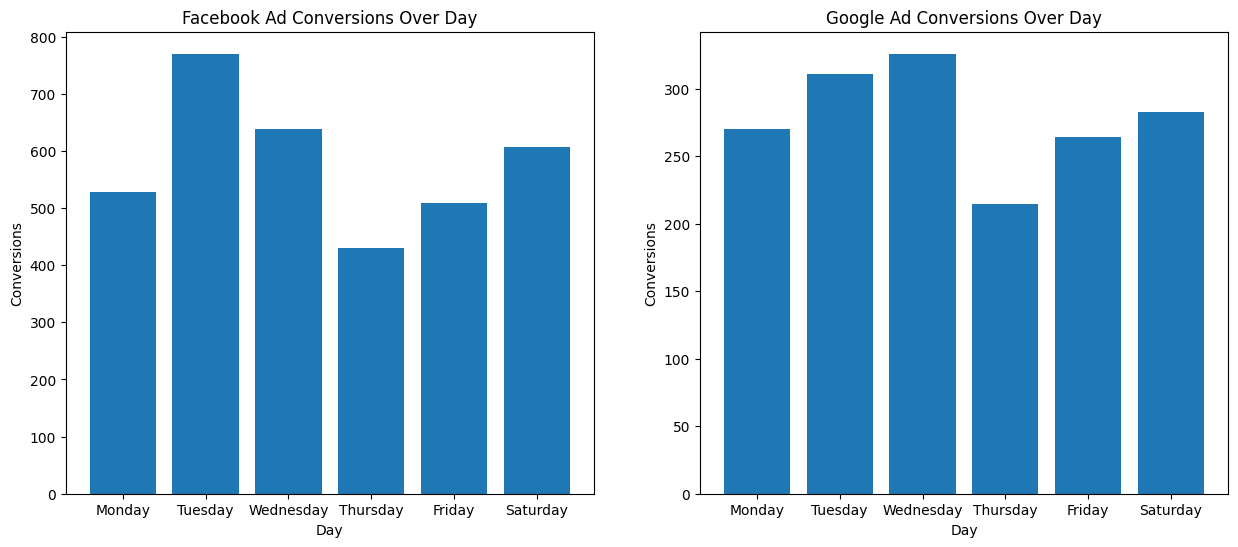

In [22]:
#3 for fb
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook Ad Conversions Over Day")
plt.bar(daily_converts_fb['day_of_campaign'], daily_converts_fb['facebook_ad_conversions'])
plt.xlabel("Day")
plt.ylabel("Conversions")

#for adwords
plt.subplot(1,2,2)
plt.title("Google Ad Conversions Over Day")
plt.bar(daily_converts_aw['day_of_campaign'], daily_converts_aw['adword_ad_conversions'])
plt.xlabel("Day")
plt.ylabel("Conversions")
plt.show()
#

# **A/B Testing**

**Hypothesis: Advertising on Facebook will generate more conversions as compared to Advertising on Adwords**

<br>

**Null Hypothesis:** There is no significant difference between the conversion rates of the Facebook and AdWords campaigns.


**Alternative Hypothesis:** There is a significant difference between the conversion rates of the Facebook and AdWords campaigns.

<br>

**We will use two-proportion z-test to compare the conversion rates of Facebook and Google Ads, since conversion rate is proportional data. The test is conducted at a 5% significance level (α = 0.05)**

In [23]:
fb_conversions = df['facebook_ad_conversions'].sum()
fb_clicks = df['facebook_ad_clicks'].sum()
adw_conversions = df['adword_ad_conversions'].sum()
adw_clicks = df['adword_ad_clicks'].sum()
conversions = [fb_conversions, adw_conversions]
clicks = [fb_clicks, adw_clicks]

In [24]:
print("Conversion Rates\n-------------------")
print(f'FaceBook: {round((fb_conversions/fb_clicks)*100, 2)}%')
print(f'Google Ads: {round((adw_conversions/adw_clicks)*100, 2)}%')

## Applying Z-test
z_stat, p_val = sm.stats.proportions_ztest(conversions, clicks, alternative='two-sided')
print("\nZ-statistic:", z_stat)
print("p-value:", p_val)

## Comparing p_val with significance level of 0.05
if p_val < 0.05:
    print("\nP-val is less than 0.05 so we will reject the null hypothesis")
else:
    print("\nP-val is greater than 0.05 we will accept the null hypothesis")

Conversion Rates
-------------------
FaceBook: 26.71%
Google Ads: 9.49%

Z-statistic: 43.35835734406264
p-value: 0.0

P-val is less than 0.05 so we will reject the null hypothesis


# **Insights**

Based on the analysis, here are the key findings:

*   **Conversion Rates**: The Facebook ad campaign has a significantly higher conversion rate (26.71%) compared to the Google ad campaign (9.49%). This indicates that a larger percentage of users who click on Facebook ads are completing the desired action that is making a purchase or signing up.
*   **Cost Per Click (CPC)**: Google ads have a lower cost per click (\$1.97) than Facebook ads (\$3.43). This means that you pay less on average for each click on your Google ads.
*   **Cost Per Acquisition (CPA)**: Facebook ads have a lower cost per acquisition (\$12.86) compared to Google ads (\$20.77). This indicates that Facebook is more cost-effective in acquiring a conversion.
*   **Conversions Over Time**: Both platforms show fluctuations in conversions throughout the year. Facebook shows higher conversions in January, May, July, and November, while Google Ads show higher conversions in January, April, and July. Analyzing these trends further could help identify peak seasons or periods where one platform performs better than the other.
*   **Conversions by Day of the Week**: Facebook ads tend to have higher conversions on Tuesdays and Saturdays, while Google ads perform better on Wednesdays and Saturdays. This suggests that optimizing campaign scheduling based on the day of the week could improve performance.
* **A/B Testing**: The A/B test results confirm that there is a significant difference in conversion rates between Facebook and Google ad campaigns, with Facebook showing a statistically higher conversion rate.

**Conclusion:**

Although Google ads have a lower cost per click, Facebook ads are more effective in driving conversions at a lower cost per acquisition. The A/B test supports this finding, indicating that Facebook is currently providing a better return on investment in terms of conversions.

**Recommendations:**

*   **Allocate more budget to Facebook**: Given the higher conversion rate and lower CPA, consider shifting more of the advertising budget towards Facebook campaigns.
*   **Optimize Google Ads**: While Facebook is currently outperforming, explore strategies to improve Google Ads performance, such as refining targeting, ad copy, or landing pages to increase conversion rates.
*   **Analyze seasonal trends**: Use the monthly conversion data to identify peak seasons and adjust campaign strategies accordingly.
*   **Optimize daily ad spend**: Leverage the daily conversion data to allocate budget and schedule ads for the days when each platform performs best.
*   **Further testing**: Continuously monitor and test different strategies on both platforms to identify new opportunities for optimization.